**Check GPU**

In [1]:
!nvidia-smi

Tue Aug  8 11:04:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Yolov8 Config file**

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project/
!more data_merged_5.yaml

/content/drive/MyDrive/Colab Notebooks/207_Project
path: /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5
train: train/images
val: valid/images
test: test/images

nc: 13
names: ['aircraft', 'baggage_truck', 'bus', 'fuel_truck', 'ground_power', 'perso
n', 'rolling_stairway', 'ramp_loader', 'stairway', 'bridge_connected', 'catering
_truck', 'fueling', 'pushback_tractor']

roboflow:
  workspace: aircraftturnaround
  project: aircraftturnaround_final2
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/aircraftturnaround/aircraftturnaround_final
2/dataset/1


**Install & Import packages**

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

import os
HOME = os.getcwd()
print(HOME)

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project
model = YOLO()
model = YOLO("yolov8n.pt")

**Model Training**

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project/
model.train(data="data_merged_5.yaml", epochs=30)

/content/drive/MyDrive/Colab Notebooks/207_Project


Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data_merged_5.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

**Model Testing**

In [ ]:
import locale
locale.getpreferredencoding()
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project
!yolo task=detect mode=val model='runs/detect/train/weights/best.pt' data=data_merged_5.yaml split=test

/content/drive/MyDrive/Colab Notebooks/207_Project
Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/labels... 575 images, 0 backgrounds, 0 corrupt: 100% 575/575 [00:03<00:00, 175.26it/s]
val: New cache created: /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:23<00:00,  1.51it/s]
                   all        575       3221       0.96      0.947      0.976      0.806
              aircraft        575        447      0.966       0.95      0.989      0.943
         baggage_truck        575        152      0.971      0.888      0.968      0.839
                   bus        575         74      0.895          1      0.983      0.853
            fuel_truck       

**Model Prediction - Test images**

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.5 source=dataset_merged_5/test/images

/content/drive/MyDrive/Colab Notebooks/207_Project
Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients

image 1/575 /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/images/-157521935_jpg.rf.39bdc0d3bbe9f6f847a0341e7077f5bc.jpg: 640x640 1 aircraft, 1 bridge_connected, 1 catering_truck, 8.8ms
image 2/575 /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/images/02-gpu-Bertoli-aereoporto-Lampedusa_jpg.rf.5f67b556e6f8dc4c42f61ae5afbe8bd9.jpg: 640x640 (no detections), 7.4ms
image 3/575 /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/images/02-gpu-Bertoli-aereoporto-Lampedusa_jpg.rf.79be3c1871975af8636891d1dc112d5f.jpg: 640x640 (no detections), 7.4ms
image 4/575 /content/drive/MyDrive/Colab Notebooks/207_Project/dataset_merged_5/test/images/02-gpu-Bertoli-aereoporto-Lampedusa_jpg.rf.8e043413d7e7dd2c42f95b3195d15e5f.jpg: 6

**Confusion Matrix of the model testing**

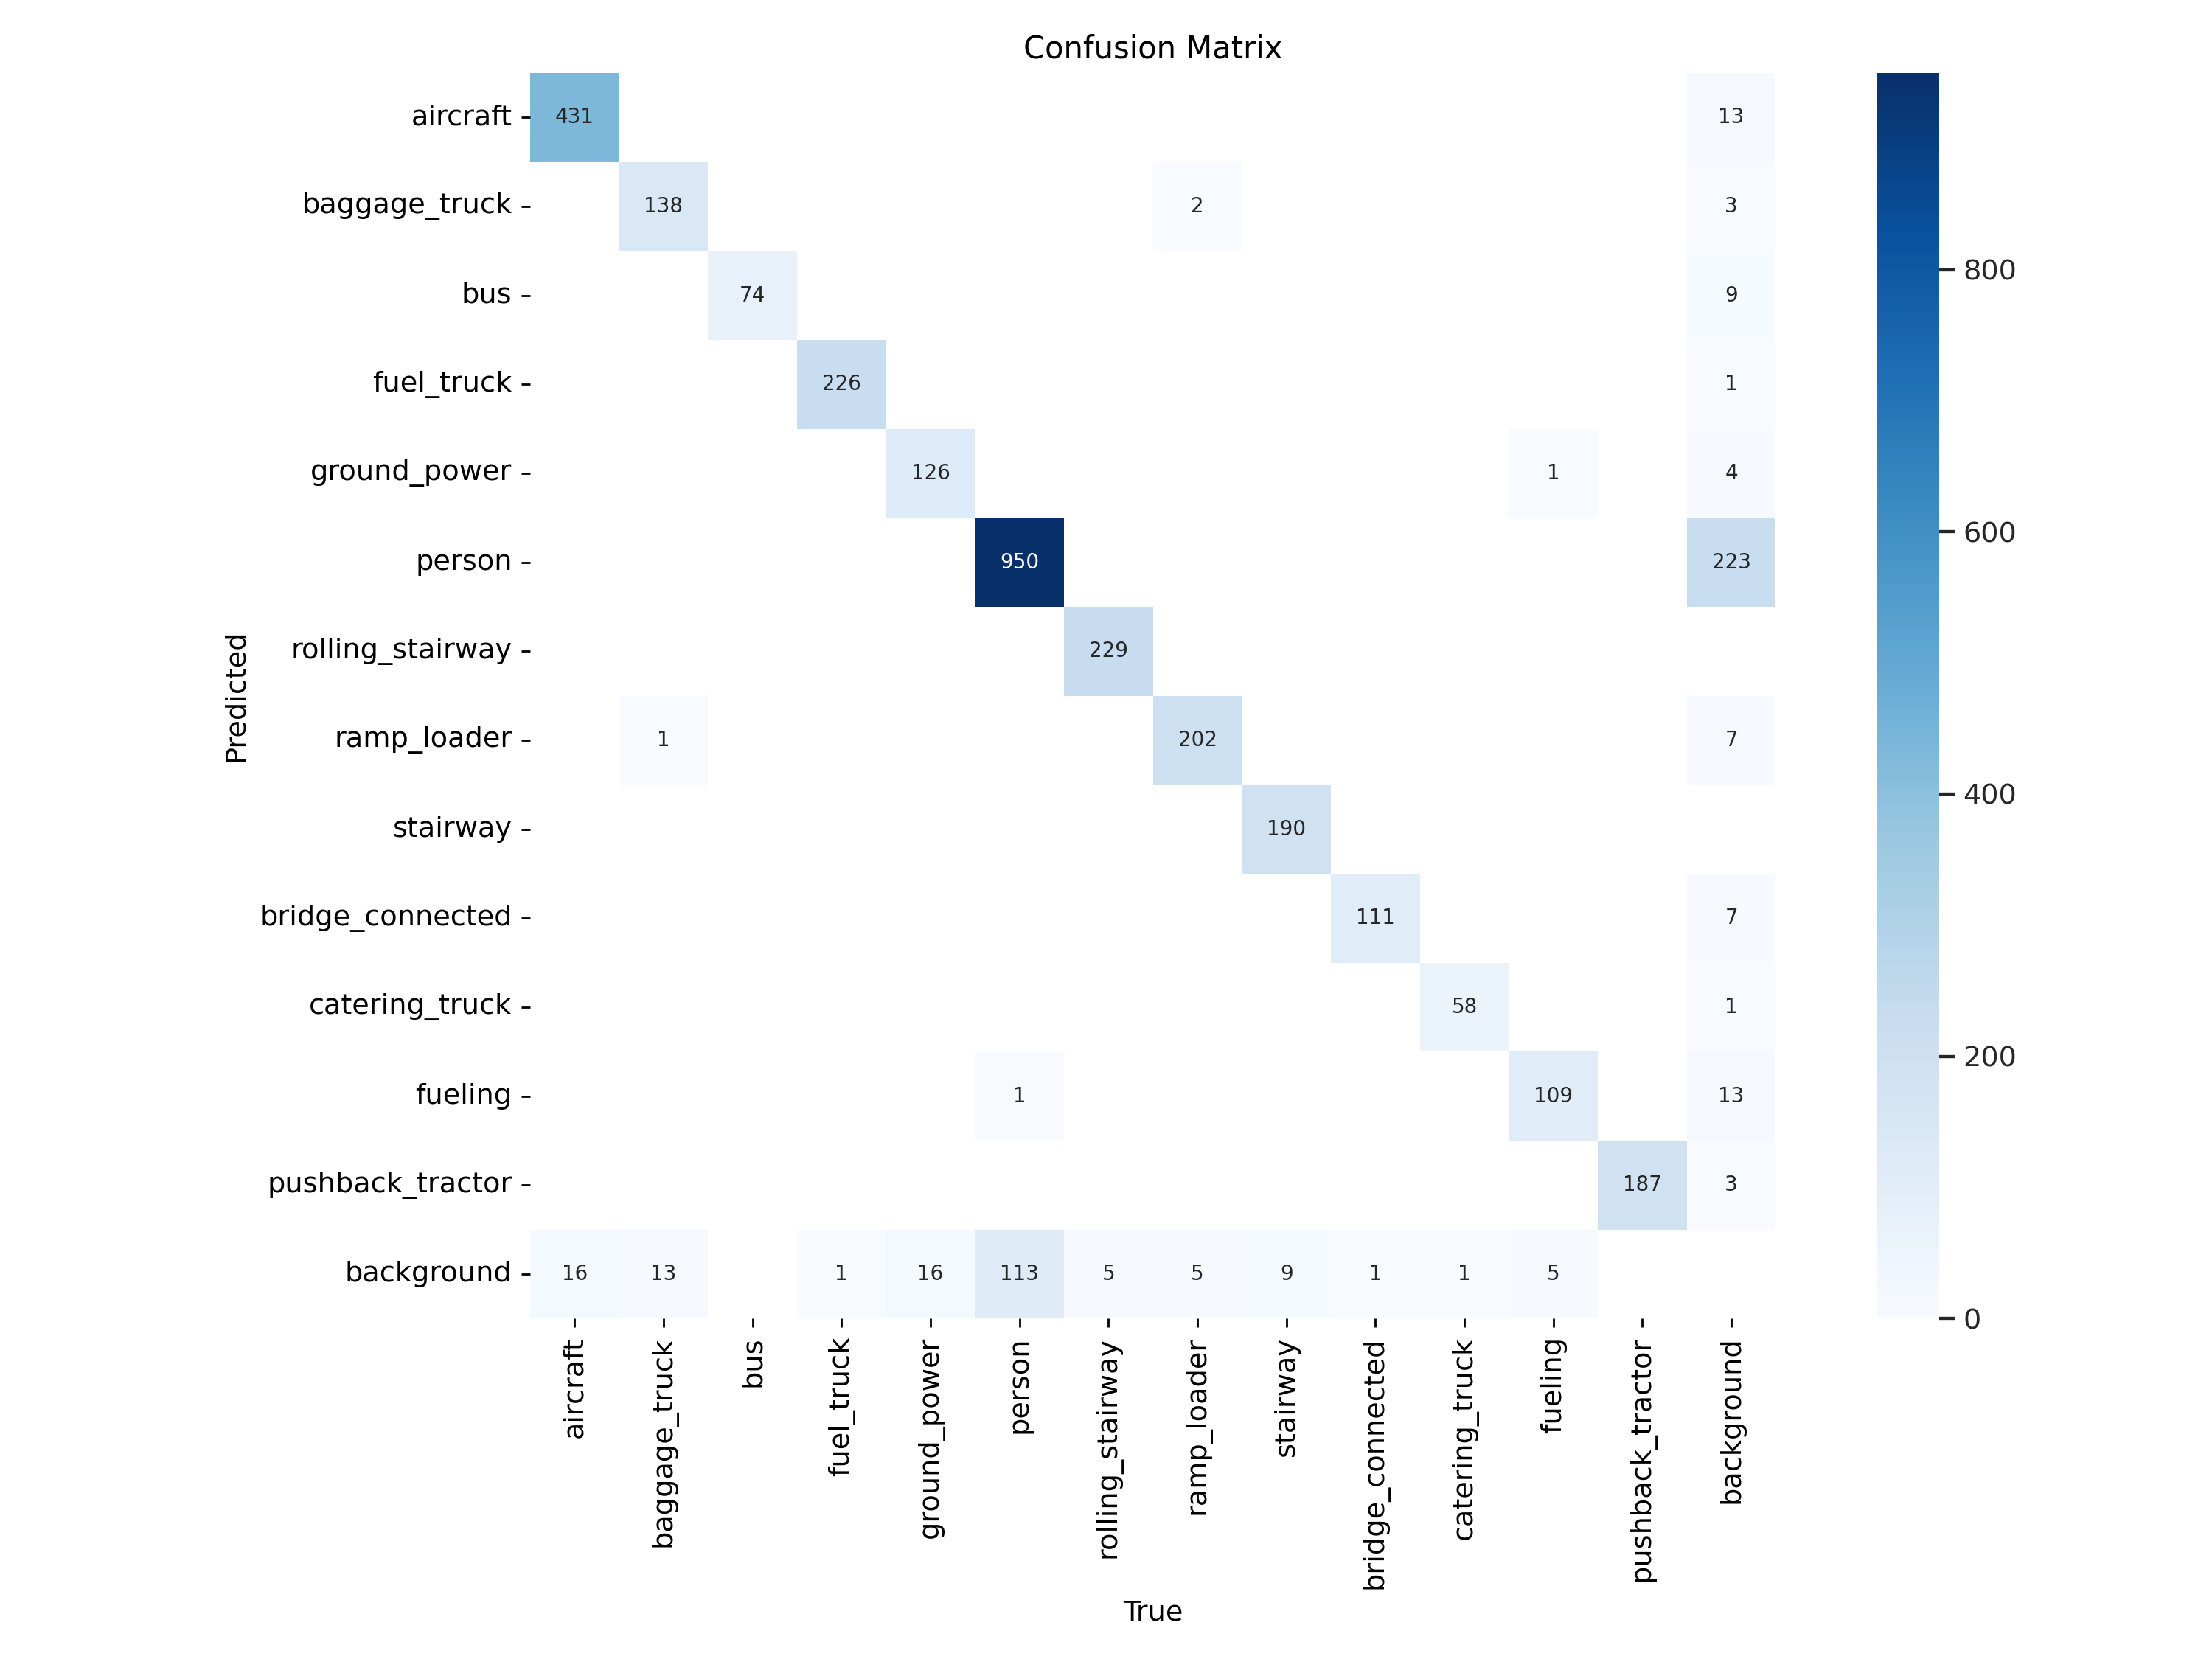

In [ ]:
Image(filename='runs/detect/val/confusion_matrix.png', width=800)

**Training and Validation loss**

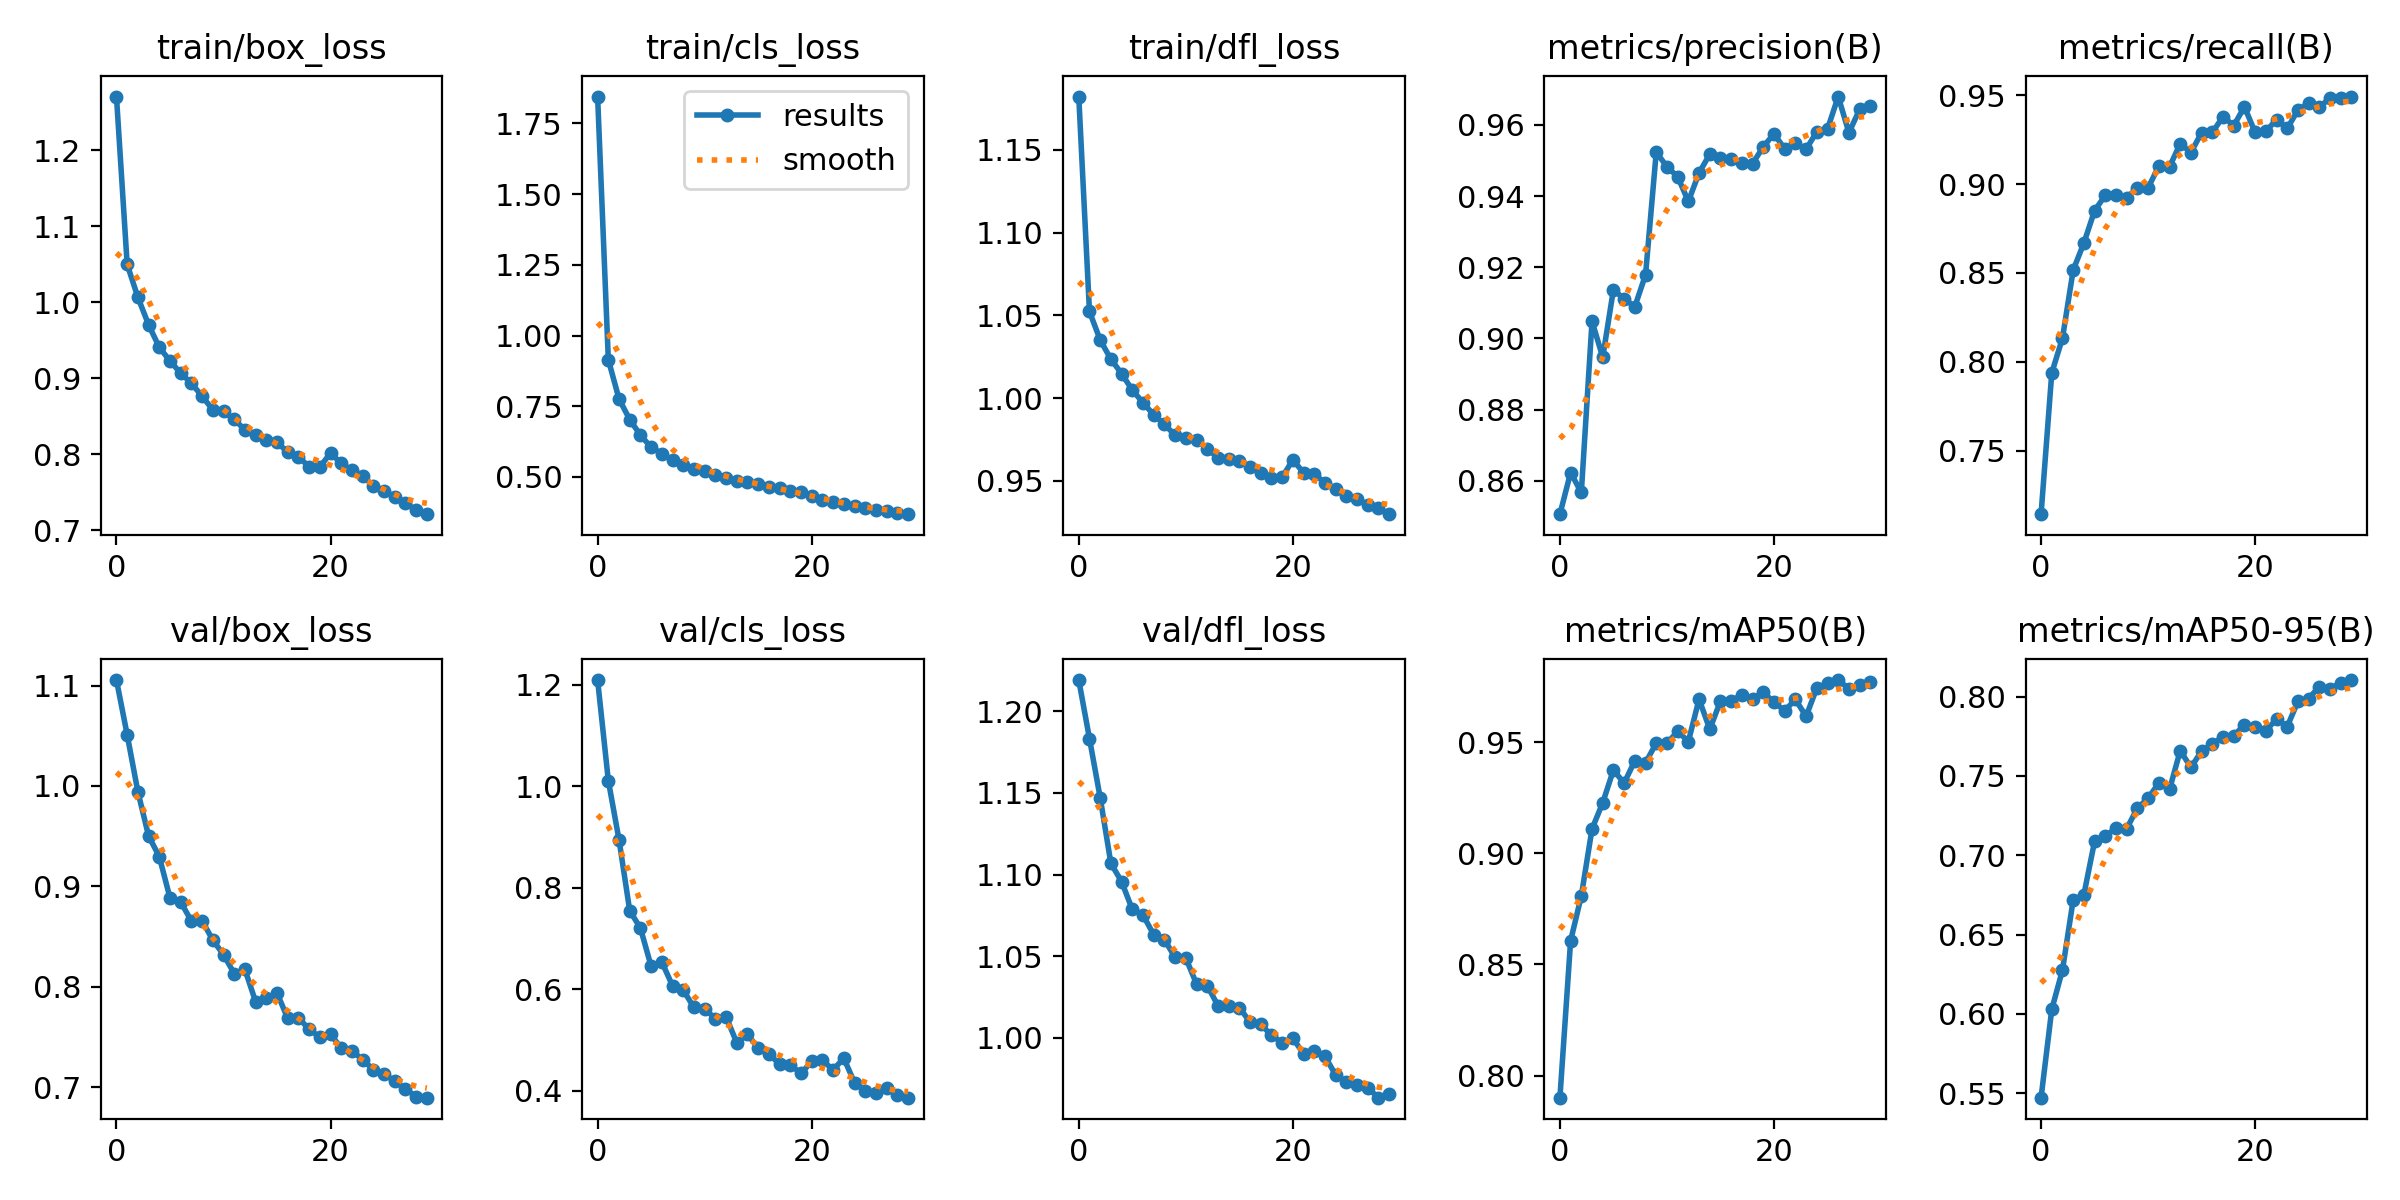

In [ ]:
Image(filename='runs/detect/train/results.png', width=800)

**Predicted Results**

In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project

/content/drive/MyDrive/Colab Notebooks/207_Project


In [5]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[500:]:
      display(Image(filename=image_path, width=400))
      print("\n")

**Model Prediction - Video**

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/207_Project
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.5 source=video/Ryanair_turnaround.mp4 > Ryanair_turnaround_logs.txt 2>&1

/content/drive/MyDrive/Colab Notebooks/207_Project
